Churn value counts:
Churn
0    5174
1    1869
Name: count, dtype: int64


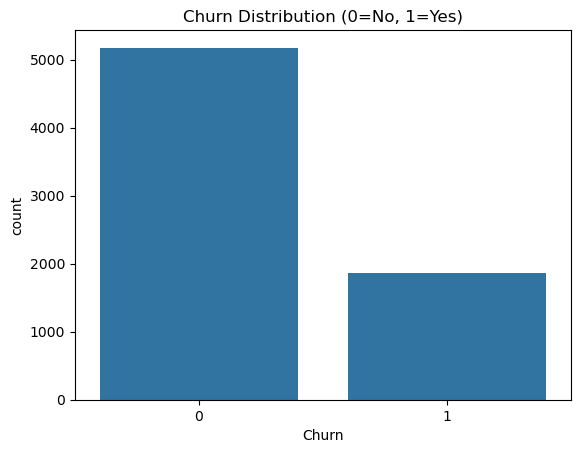

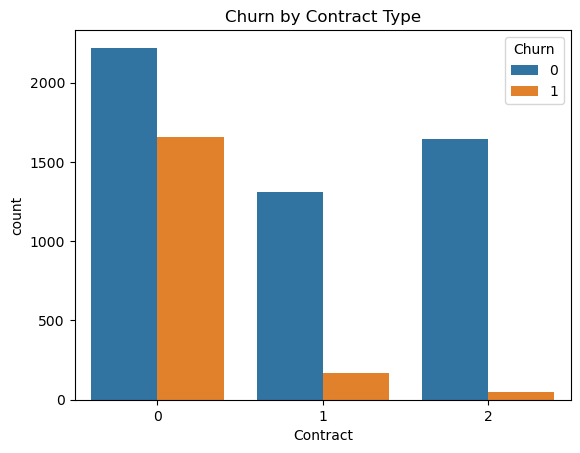

Confusion Matrix:
[[928 107]
 [191 183]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC AUC Score: 0.8196


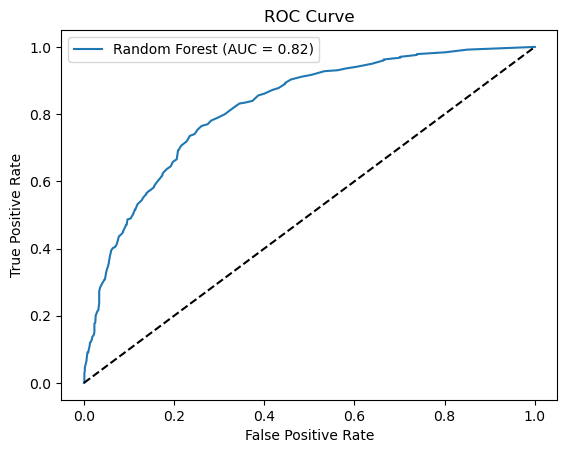

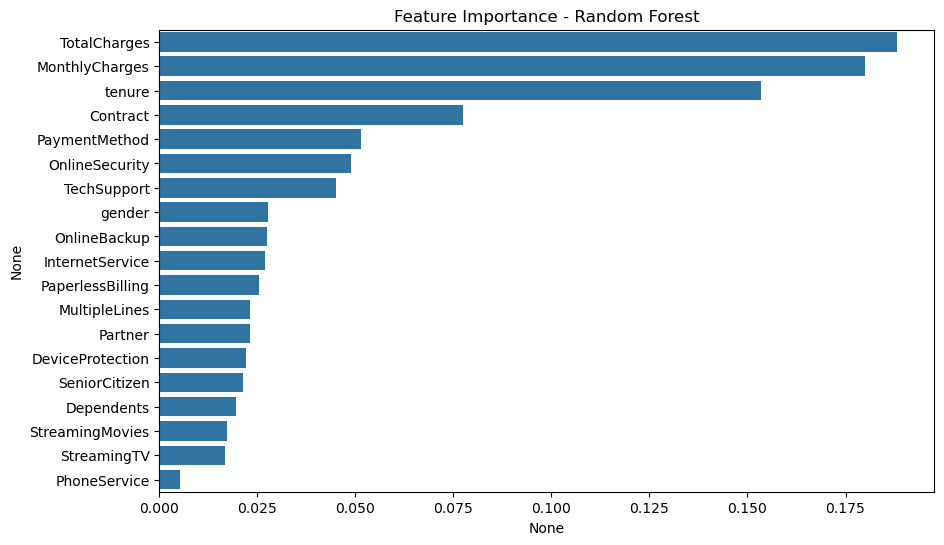

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load dataset
data = pd.read_csv(r'C:\Users\vimal\Desktop\customer telecom churn.csv')

# --- Data Cleaning ---
# Convert TotalCharges to numeric, coerce errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
data = data.dropna()

# Drop customerID as it's not useful for prediction
data = data.drop('customerID', axis=1)

# --- Encode categorical variables ---
# Find all object type columns except target 'Churn'
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Churn')

# Encode categorical variables with LabelEncoder (simple approach)
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# Encode target variable Churn: 'No'->0, 'Yes'->1
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

# --- Exploratory Data Analysis (EDA) ---
print("Churn value counts:")
print(data['Churn'].value_counts())

# Plot churn distribution
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution (0=No, 1=Yes)')
plt.show()

# Example: visualize churn by Contract type
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.show()

# --- Feature and target split ---
X = data.drop('Churn', axis=1)
y = data['Churn']

# Scale features (especially for numeric continuous variables)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --- Model training ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Predictions ---
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# --- Evaluation ---
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# --- Feature Importance ---
importances = model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Feature Importance - Random Forest')
plt.show()
